In [140]:
import numpy as np
import pandas as pd
np.random.seed(12345)
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

- 의료 보조 서비스
- 수식화 (모델링) 단계
    - 어떤 대상이 이 서비스(모델)를 사용할 것인가?
    - **어떤 설명변수를 선택하는가**
    - 의사를 대상으로 할 때 
    - 환자를 대상으로 할 때 

In [141]:
import pandas as pd

In [142]:
df1 = pd.read_csv("examples/preprocessing.csv")
print(df1.shape)
df1.head(2)

(1894, 52)


,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [144]:
df1.isnull().sum()

Unnamed: 0                   0
환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
                          ... 
골밀도                        896
디스크단면적                       1
디스크위치                        0
척추이동척도                       0
척추전방위증                       0
Length: 52, dtype: int64

In [145]:
df1.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [146]:
# 변수 선택(서비스의 대상을 기준으로)
df2 = df1[["성별", "신장", "체중", "흡연여부", "연령", "혈액형", "직업", "재발여부"]]
df3 = df2.dropna() # 결측치 제거
print(df3.shape)

(1479, 8)


- 설명변수 및 목표변수 설정

In [147]:
# 더미변수처리(문자 데이터 -> One Hot Encoding)
X = df3.drop(columns="재발여부")
X1 = pd.get_dummies(X)

In [148]:
X1

,성별,신장,체중,흡연여부,연령,혈액형_RH+A,혈액형_RH+AB,혈액형_RH+B,혈액형_RH+O,직업_건설업,...,직업_사무직,직업_사업가,직업_예술가,직업_운동선수,직업_운수업,직업_의료직,직업_자영업,직업_주부,직업_특수전문직,직업_학생
0,2,163,60.3,0,66,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,171,71.7,0,47,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,178,77.1,0,39,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,174,74.2,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,183,80.7,0,42,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2,157,64.0,0,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890,2,157,59.0,0,42,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1891,1,167,70.0,0,61,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1892,1,177,77.0,0,29,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [149]:
Y = df3["재발여부"]

In [150]:
Y.value_counts()

0    1302
1     177
Name: 재발여부, dtype: int64

In [151]:
# 기계학습 알고리즘 호출
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import MinMaxScaler
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import classification_report
from sklearn.tree            import plot_tree

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3,
                                                    random_state= 1234)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1035, 26)
(1035,)
(444, 26)
(444,)


In [153]:
pipe_list = [("scaler" ,MinMaxScaler()),("model" ,DecisionTreeClassifier())]
pipe_model = Pipeline(pipe_list)
pipe_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

In [154]:
hyper_list = {"model__max_depth":range(2, 10),
              "model__min_samples_leaf":range(2, 10),
              "model__criterion":["gini","entropy"],
              "model__class_weight":[None,"balanced"],
              "model__min_samples_split":range(2, 10)}

grid_model = GridSearchCV(pipe_model, param_grid=hyper_list,
                          scoring="f1",
                          n_jobs= -1,
                          cv = 5)

grid_model.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(2, 10),
                         'model__min_samples_leaf': range(2, 10),
                         'model__min_samples_split': range(2, 10)},
             scoring='f1')

In [155]:
best_model = grid_model.best_estimator_

In [156]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

- 분류 모델에서 확인하고자 하는 Target 항목의 데이터 비율이 적다면?
    - recall 값이 매우 떨어지는 현상 도출

In [157]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       911
           1       0.93      0.23      0.36       124

    accuracy                           0.91      1035
   macro avg       0.92      0.61      0.66      1035
weighted avg       0.91      0.91      0.88      1035



In [158]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       391
           1       0.56      0.09      0.16        53

    accuracy                           0.88       444
   macro avg       0.72      0.54      0.55       444
weighted avg       0.85      0.88      0.84       444



- 트리구조 시각화

In [159]:
col_name = X_train.columns
col_name

Index(['성별', '신장', '체중', '흡연여부', '연령', '혈액형_RH+A', '혈액형_RH+AB', '혈액형_RH+B',
       '혈액형_RH+O', '직업_건설업', '직업_공무원', '직업_교사', '직업_군인', '직업_노동직', '직업_농업',
       '직업_무직', '직업_사무직', '직업_사업가', '직업_예술가', '직업_운동선수', '직업_운수업', '직업_의료직',
       '직업_자영업', '직업_주부', '직업_특수전문직', '직업_학생'],
      dtype='object')

In [160]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\ahnjh\AppData\Local\Temp\ipykernel_35080\2578555594.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [161]:
best_model["model"]

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 51064 (\N{HANGUL SYLL

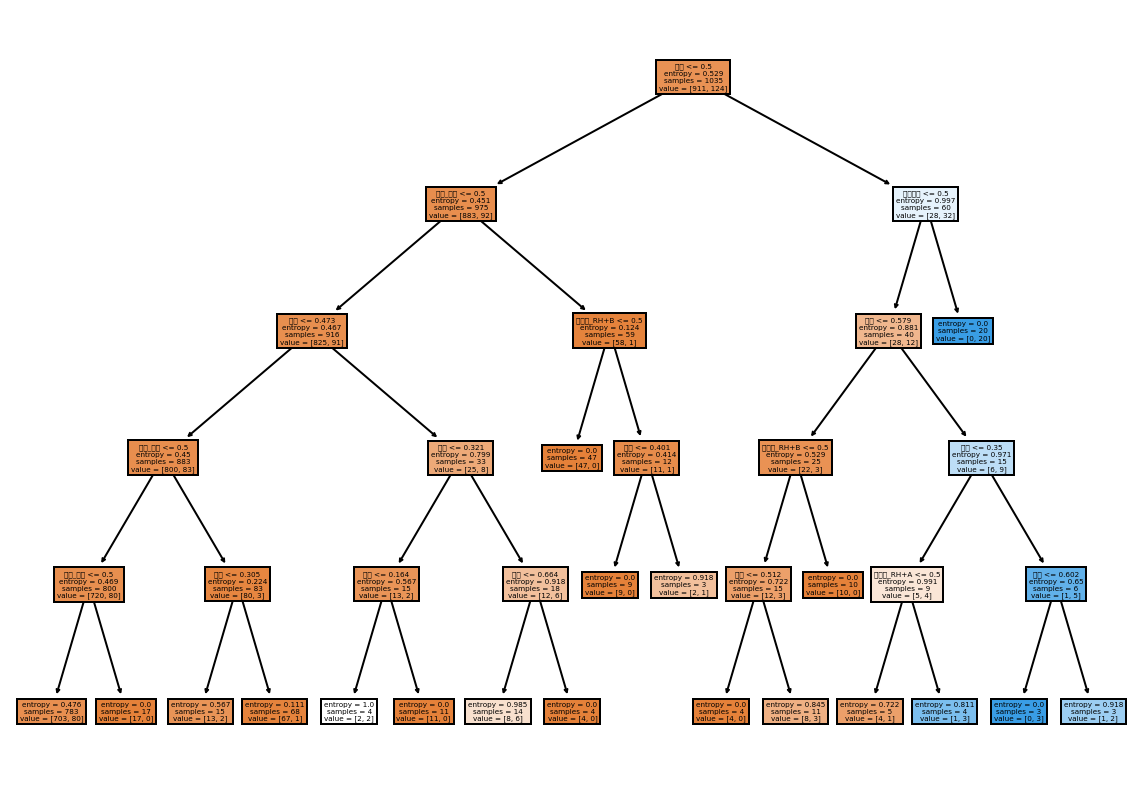

In [162]:
plt.figure(figsize=(10, 7))
plot_tree(best_model["model"], feature_names=col_name, filled=True)
plt.show()

- 설명변수 중요도 

In [163]:
df_importance = pd.DataFrame()
df_importance["Feature"]= col_name
df_importance["Importance"]= best_model["model"].feature_importances_

In [164]:
df_importance.sort_values(by="Importance", ascending=False).head(5)

,Feature,Importance
2,체중,0.531462
3,흡연여부,0.205908
4,연령,0.063592
1,신장,0.054365
7,혈액형_RH+B,0.039850


In [165]:
# Importance 값이 높은 상위 5개의 Feature들을 리스트로 선언
order_list = df_importance.sort_values(by="Importance", 
                          ascending=False).head(5)["Feature"].tolist()

<AxesSubplot: xlabel='Feature', ylabel='Importance'>

C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Pytho

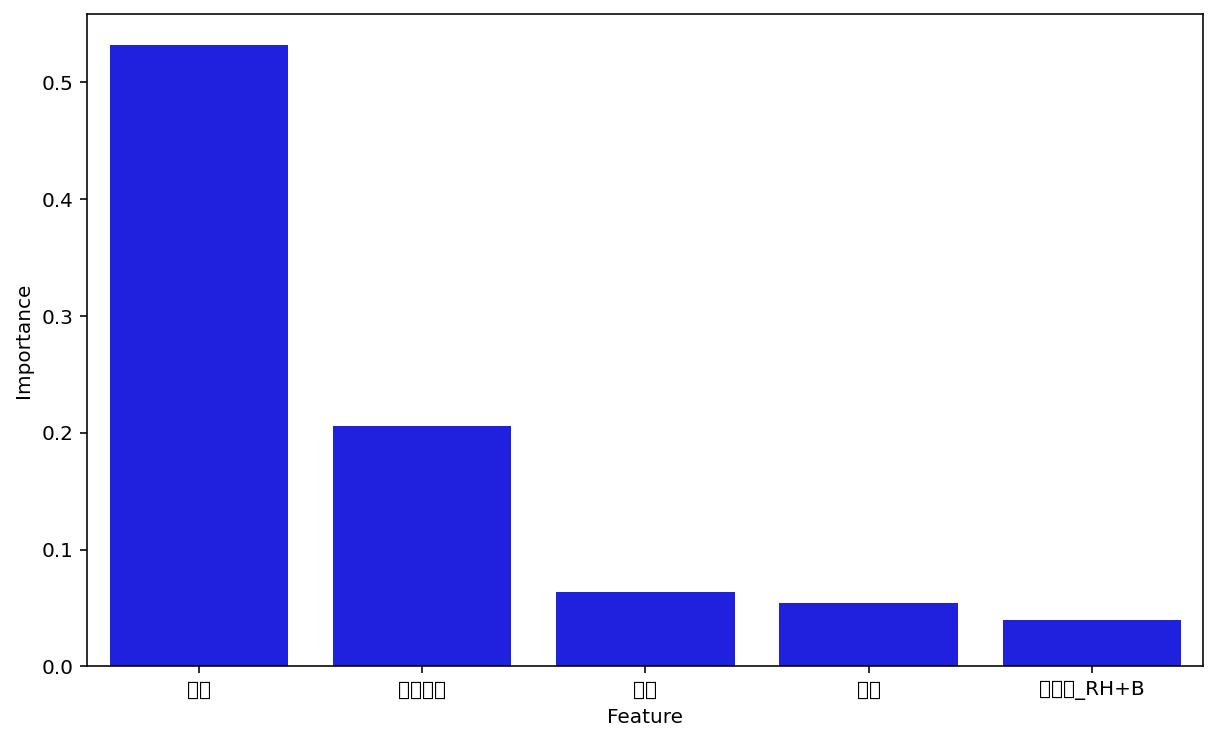

In [166]:
import seaborn as sns
sns.barplot(data=df_importance, x="Feature", y="Importance", color="b", order=order_list)

- 모델 개선 작업
    - Sampling (Under Sampling)
    - Threshold

In [167]:
from imblearn.under_sampling import RandomUnderSampler

In [168]:
Y.value_counts()

0    1302
1     177
Name: 재발여부, dtype: int64

In [169]:
sample_model = RandomUnderSampler()
X_under, Y_under = sample_model.fit_resample(X1, Y)

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size=0.3,
                                                    random_state=1234)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(247, 26)
(247,)
(107, 26)
(107,)


In [171]:
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(2, 10),
                         'model__min_samples_leaf': range(2, 10),
                         'model__min_samples_split': range(2, 10)},
             scoring='f1')

In [172]:
best_model = grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [173]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68       120
           1       0.69      0.89      0.78       127

    accuracy                           0.74       247
   macro avg       0.76      0.73      0.73       247
weighted avg       0.76      0.74      0.73       247



In [174]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.40      0.49        57
           1       0.52      0.74      0.61        50

    accuracy                           0.56       107
   macro avg       0.58      0.57      0.55       107
weighted avg       0.58      0.56      0.55       107



c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Python310\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 51064 (\N{HANGUL SYLL

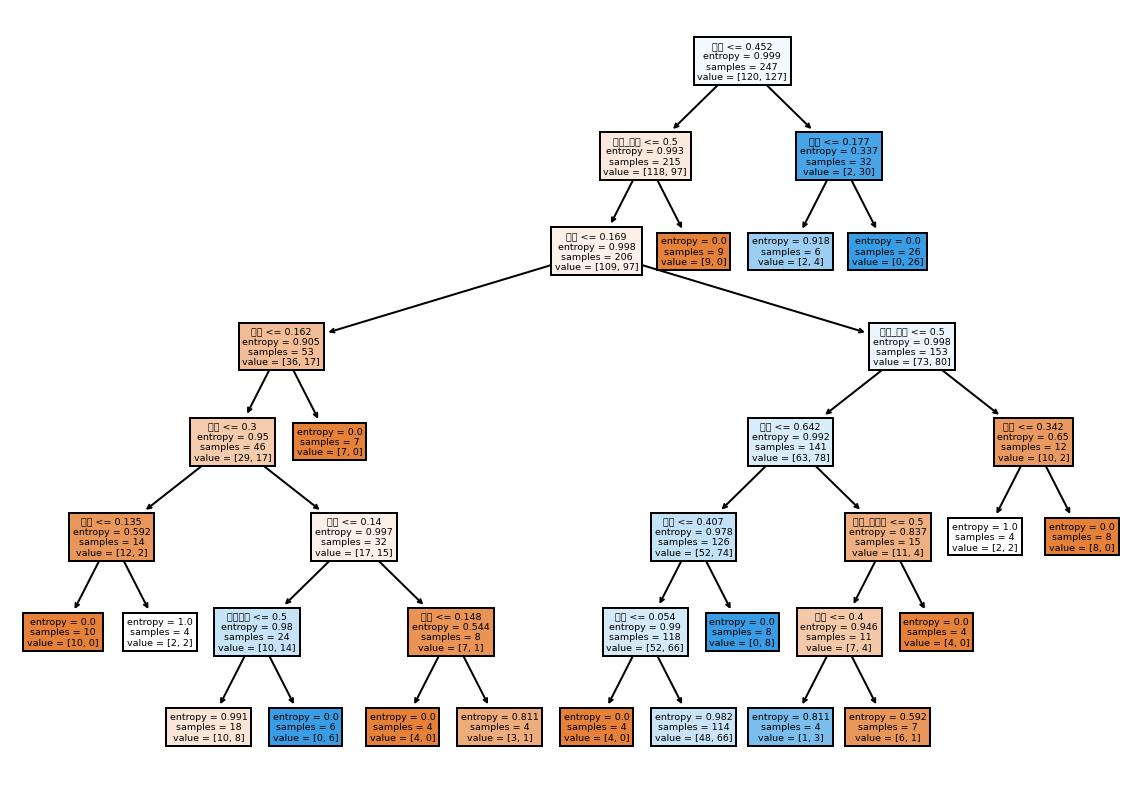

In [175]:
plt.figure(figsize=(10, 7))
plot_tree(best_model["model"], feature_names=col_name, filled=True)
plt.show()

In [176]:
order_list = df_importance.sort_values(by="Importance", 
                          ascending=False).head(5)["Feature"].tolist()

<AxesSubplot: xlabel='Feature', ylabel='Importance'>

C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Pytho

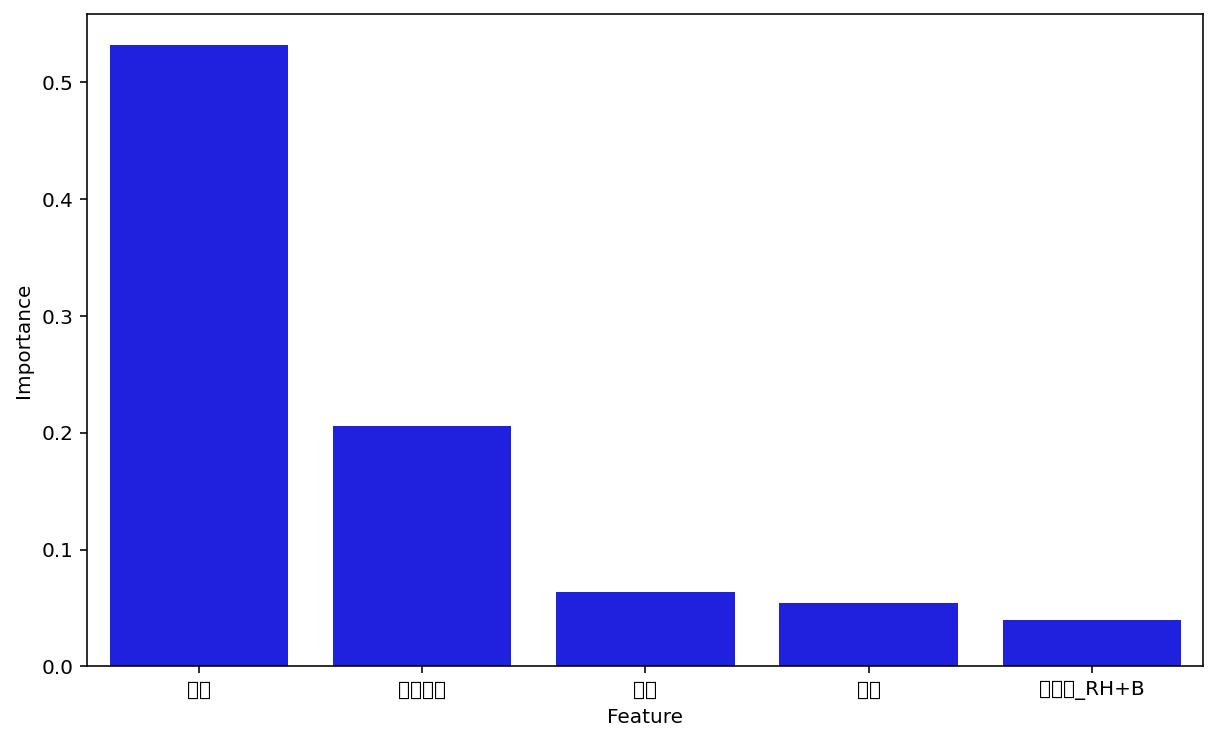

In [177]:
sns.barplot(data=df_importance, x="Feature", y="Importance",
            color="b", order=order_list)

- 모델 개선 작업 2
    - Threshold

In [178]:
# 정상/재발 확률 값
best_model.predict_proba(X_test)

array([[0.4211, 0.5789],
       [0.75  , 0.25  ],
       [0.    , 1.    ],
       [0.4211, 0.5789],
       [0.4211, 0.5789],
       [0.    , 1.    ],
       [0.5   , 0.5   ],
       [0.4211, 0.5789],
       [0.    , 1.    ],
       [0.4211, 0.5789],
       [1.    , 0.    ],
       [0.4211, 0.5789],
       [0.4211, 0.5789],
       [0.4211, 0.5789],
       [1.    , 0.    ],
       [0.4211, 0.5789],
       [0.4211, 0.5789],
       [0.4211, 0.5789],
       [0.    , 1.    ],
       [0.5556, 0.4444],
       [0.    , 1.    ],
       [0.4211, 0.5789],
       [1.    , 0.    ],
       [0.5   , 0.5   ],
       [0.4211, 0.5789],
       [1.    , 0.    ],
       [0.4211, 0.5789],
       [0.4211, 0.5789],
       [0.5   , 0.5   ],
       [0.    , 1.    ],
       [0.4211, 0.5789],
       [0.    , 1.    ],
       [0.5   , 0.5   ],
       [1.    , 0.    ],
       [0.4211, 0.5789],
       [0.4211, 0.5789],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.4211, 0.5789],
       [1.    , 0.    ],


In [179]:
from sklearn.preprocessing import Binarizer

- 일반적으로 50% 기준으로 정상/재발 분류

In [180]:
class_result = np.concatenate([best_model.predict_proba(X_test), # 0 또는 1로 분류할 확률
                best_model.predict(X_test).reshape(-1, 1)], # 실제 분류된 결과
               axis=1)

pd_result = pd.DataFrame(class_result, columns=["정상확률", "재발확률", "분류값"])
pd_result["분류값"].value_counts()

1.0    71
0.0    36
Name: 분류값, dtype: int64

- 분류 확률 30%로 조정 정상/재발 분류

In [181]:
pred_proba         = best_model.predict_proba(X_test)
pred_proba_target  = pred_proba[:, 1].reshape(-1,1) # "재발" 분류 될 확률만 추출

# 새로운 임계값 적용
thres_model = Binarizer(threshold=0.3).fit(pred_proba_target) # Fit
thres_pred  = thres_model.transform(pred_proba_target)        # 변환

In [182]:
df_proba = pd.DataFrame(best_model.predict_proba(X_test))   
df_proba

,0,1
0,0.421053,0.578947
1,0.750000,0.250000
2,0.000000,1.000000
3,0.421053,0.578947
4,0.421053,0.578947
...,...,...
102,1.000000,0.000000
103,0.421053,0.578947
104,0.421053,0.578947
105,0.421053,0.578947


In [183]:
class_result = np.concatenate([best_model.predict_proba(X_test), # 0 또는 1로 분류할 확률
                thres_pred.reshape(-1, 1)], # 실제 분류된 결과
               axis=1)

pd_result = pd.DataFrame(class_result, columns=["정상확률", "재발확률", "분류값"])
pd_result["분류값"].value_counts()

1.0    83
0.0    24
Name: 분류값, dtype: int64

In [184]:
print(classification_report(Y_test, thres_pred))

              precision    recall  f1-score   support

           0       0.62      0.26      0.37        57
           1       0.49      0.82      0.62        50

    accuracy                           0.52       107
   macro avg       0.56      0.54      0.49       107
weighted avg       0.56      0.52      0.49       107

